In [ ]:
orth = ['../out/orthologs_correlation_g%d.tsv' % x
        for x in range(3)]

In [2]:
# plotting imports
%matplotlib inline

import matplotlib.pyplot as plt
import joypy
import seaborn as sns

sns.set_style('white')

plt.rc('font', size=12)

In [3]:
# other imports
import itertools
import numpy as np
import pandas as pd

In [4]:
strains = ['S288C', 'Y55',
           'UWOP', 'YPS']
cstrains = {x: c
            for x, c in zip(strains, sns.color_palette('Set1', len(strains)))}

In [5]:
rs = []
for i, x in enumerate(orth):
    r = pd.read_table(x)
    r['strata'] = i
    rs.append(r[r['genes'] == 'same'])
    rs.append(r[r['genes'] == 'shuffled'])
r = pd.concat(rs)

In [6]:
g = r.groupby(['gene', 'strata', 'genes'])['corr'].mean().reset_index()

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:20: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
/home/mgalactus/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


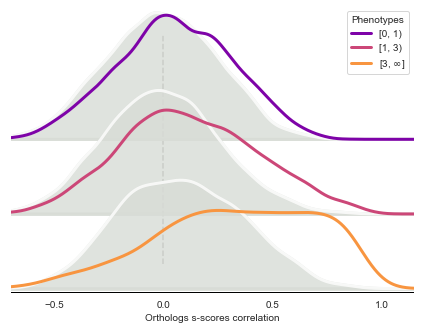

In [7]:
jp = joypy.joyplot(r[r['genes'] == 'shuffled'],
                   column='corr',
                   by='strata',
                   color=sns.xkcd_rgb['light grey'],
                   lw=3,
                   linecolor='w',
                   ylabels=False,
                   alpha=0.8,
                   overlap=1.25,
                   figsize=(6, 4.5))
lc = joypy.joyplot(r[r['genes'] == 'same'],
                   column='corr',
                   by='strata',
                   ax=jp[1][:-1],
                   color=sns.xkcd_rgb['light red'],
                   fill=False,
                   lw=3,
                   ylabels=False,
                   overlap=1.25,
                   figsize=(6, 4.5))

for ax, color in zip(jp[1][:-1],
                     sns.color_palette('plasma', 3)):
    ax.set_ylim(-0.05)
    ax.set_xlim(-0.7, 1.15)
    l = ax.lines[-1]
    l.set_color(color)

plt.legend([x.lines[-1]
            for x in jp[1][:-1]],
           ['[0, 1)',
            '[1, 3)',
            '[3, $\infty$]'],
           title='Phenotypes')

ax = jp[1][-1]
ax.axvline(0,
           0.1, 0.9,
           color=sns.xkcd_rgb['grey'],
           ls='dashed',
           zorder=10)
plt.xlabel('Orthologs s-scores correlation')
plt.xlim(-.7, 1.15)
plt.axhline(0,
            color='k',
            lw=2)

plt.savefig('orthologs.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('orthologs.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:20: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
/home/mgalactus/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


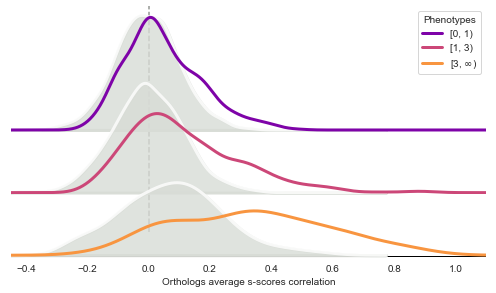

In [8]:
jp = joypy.joyplot(g[g['genes'] == 'shuffled'],
                   column='corr',
                   by='strata',
                   color=sns.xkcd_rgb['light grey'],
                   lw=3,
                   linecolor='w',
                   ylabels=False,
                   alpha=0.8,
                   overlap=1.25,
                   figsize=(7, 4))
lc = joypy.joyplot(g[g['genes'] == 'same'],
                   column='corr',
                   by='strata',
                   ax=jp[1][:-1],
                   color=sns.xkcd_rgb['light red'],
                   fill=False,
                   lw=3,
                   ylabels=False,
                   overlap=1.25,
                   figsize=(7, 4))

for ax, color in zip(jp[1][:-1],
                     sns.color_palette('plasma', 3)):
    ax.set_ylim(-0.05, 4.)
    ax.set_xlim(-0.45, 1.1)
    l = ax.lines[-1]
    l.set_color(color)

plt.legend([x.lines[-1]
            for x in jp[1][:-1]],
           ['[0, 1)',
            '[1, 3)',
            '[3, $\infty$)'],
           title='Phenotypes')

ax = jp[1][-1]
ax.axvline(0,
           0.1, 1,
           color=sns.xkcd_rgb['grey'],
           ls='dashed',
           zorder=10)
plt.xlabel('Orthologs average s-scores correlation')
plt.xlim(-.45, 1.1)
plt.axhline(0,
            color='k',
            lw=2)

plt.savefig('orthologs-avg.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('orthologs-avg.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

In [9]:
cstrains = {'S288C': 'Reds',
            'Y55': 'Blues',
            'UWOP': 'Greens',
            'YPS': 'Purples'}

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:25: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
/home/mgalactus/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:25: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
/home/mgalactus/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a p

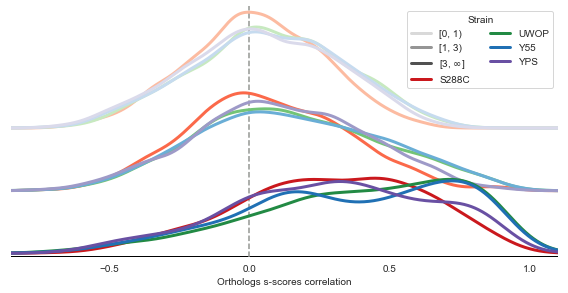

In [10]:
jp = None
for strain in sorted(r['strain1'].unique()):
    g = r[(r['strain1'] == strain) |
           (r['strain2'] == strain)]
    if jp is None:
        jp = joypy.joyplot(g[g['genes'] == 'same'],
                           column='corr',
                           by='strata',
                           color=sns.xkcd_rgb['light red'],
                           fill=False,
                           lw=3,
                           ylabels=False,
                           overlap=1.25,
                           figsize=(8, 4))
    else:
        lc = joypy.joyplot(g[g['genes'] == 'same'],
                           column='corr',
                           by='strata',
                           ax=jp[1][:-1],
                           color=sns.xkcd_rgb['light red'],
                           fill=False,
                           lw=3,
                           ylabels=False,
                           overlap=1.25,
                           figsize=(8, 4))
    for ax, color in zip(jp[1][:-1],
                         sns.color_palette(cstrains[strain], 3)):
        ax.set_ylim(-0.05)
        ax.set_xlim(-0.85, 1.1)
        l = ax.lines[-1]
        l.set_color(color)

ax = jp[1][-1]
ax.axvline(0,
           0, 1,
           color=sns.xkcd_rgb['grey'],
           ls='dashed',
           zorder=10)
plt.xlabel('Orthologs s-scores correlation')
plt.xlim(-.85, 1.1)
plt.axhline(0,
            color='k',
            lw=2)

plt.legend([x.lines[0]
            for x in jp[1][:-1]] + 
           [x
            for x in jp[1][-2].lines],
           ['[0, 1)',
            '[1, 3)',
            '[3, $\infty$]'] +
           sorted(r['strain1'].unique()),
           title='Strain',
           ncol=2)

leg = plt.gca().get_legend()
for i, color in enumerate(sns.color_palette('Greys', 3)):
    leg.legendHandles[i].set_color(color)

plt.savefig('orthologs-strains.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('orthologs-strains.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);

/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:26: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
/home/mgalactus/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/usr/local/lib/python3.6/dist-packages/ipykernel/__main__.py:26: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes
/home/mgalactus/.local/lib/python3.6/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a p

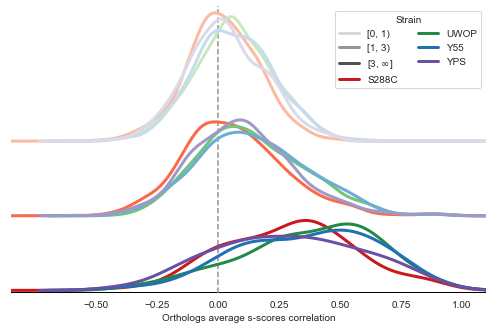

In [11]:
jp = None
for strain in sorted(r['strain1'].unique()):
    rs = r[(r['strain1'] == strain) |
           (r['strain2'] == strain)]
    g = rs.groupby(['gene', 'strata', 'genes'])['corr'].mean().reset_index()
    if jp is None:
        jp = joypy.joyplot(g[g['genes'] == 'same'],
                           column='corr',
                           by='strata',
                           color=sns.xkcd_rgb['light red'],
                           fill=False,
                           lw=3,
                           ylabels=False,
                           overlap=1.25,
                           figsize=(7, 4.5))
    else:
        lc = joypy.joyplot(g[g['genes'] == 'same'],
                           column='corr',
                           by='strata',
                           ax=jp[1][:-1],
                           color=sns.xkcd_rgb['light red'],
                           fill=False,
                           lw=3,
                           ylabels=False,
                           overlap=1.25,
                           figsize=(7, 4.5))
    for ax, color in zip(jp[1][:-1],
                         sns.color_palette(cstrains[strain], 3)):
        ax.set_ylim(-0.05)
        ax.set_xlim(-0.85, 1.1)
        l = ax.lines[-1]
        l.set_color(color)

ax = jp[1][-1]
ax.axvline(0,
           0, 1,
           color=sns.xkcd_rgb['grey'],
           ls='dashed',
           zorder=10)
plt.xlabel('Orthologs average s-scores correlation')
plt.xlim(-.85, 1.1)
plt.axhline(0,
            color='k',
            lw=2)

plt.legend([x.lines[0]
            for x in jp[1][:-1]] + 
           [x
            for x in jp[1][-2].lines],
           ['[0, 1)',
            '[1, 3)',
            '[3, $\infty$]'] +
           sorted(r['strain1'].unique()),
           title='Strain',
           ncol=2)

leg = plt.gca().get_legend()
for i, color in enumerate(sns.color_palette('Greys', 3)):
    leg.legendHandles[i].set_color(color)
    
plt.savefig('orthologs-strains-avg.png',
            dpi=300, bbox_inches='tight',
            transparent=True)
plt.savefig('orthologs-strains-avg.svg',
            dpi=300, bbox_inches='tight',
            transparent=True);